In [1]:
import torch
from torch.utils.data import DataLoader
from torch import nn
import torch.optim as optim

import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..', 'functions')))
from dataset import ChestXrayDataset
from train import train
from evaluation import plot_results ,eval_on_metrics
import timm

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
IMAGE_PATH = "../archive/"
import glob

# Tüm alt klasörlerdeki jpg ve png dosyalarını alalım
image_paths = glob.glob(IMAGE_PATH + "**/images/*.[jp][pn]g", recursive=True)

print(f"Toplam {len(image_paths)} resim bulundu.")

Toplam 112120 resim bulundu.


In [3]:
TRAIN_PATH = '../data/AP_PA_Train.xlsx'
TEST_PATH = '../data/AP_PA_Test.xlsx'
VAL_PATH = '../data/AP_PA_Validation.xlsx'
LOG_PATH = 'logs/mobilenetfullyfinetune.log'
SAVE_PATH = 'models/mobilenetfullyfinetunebestmodel.pth'

In [4]:
num_classes = 2
EPOCHS = 30

In [5]:
model = timm.create_model('mobilenetv3_large_100', pretrained=True)

model.reset_classifier(num_classes)

c:\Users\Furkan-PC\192.168.0.14+8000\.venv\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Furkan-PC\.cache\huggingface\hub\models--timm--mobilenetv3_large_100.ra_in1k. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


In [6]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(device)

cuda


In [7]:
from torchvision import transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])


In [8]:
train_dataset = ChestXrayDataset(TRAIN_PATH, image_paths,transform=transform)
val_dataset = ChestXrayDataset(TEST_PATH,image_paths, transform=transform)
test_dataset = ChestXrayDataset(VAL_PATH,image_paths, transform=transform)

In [9]:
print("Train size : ",len(train_dataset))
print("Validation size : ",len(val_dataset))
print("Test size : ",len(test_dataset))

Train size :  78566
Validation size :  16491
Test size :  17063


In [10]:
train_dataloader = DataLoader(train_dataset, batch_size=16, shuffle=True,num_workers=6)
val_dataloader = DataLoader(val_dataset, batch_size=16, shuffle=True,num_workers=6)
test_dataloader = DataLoader(test_dataset, batch_size=16, shuffle=True,num_workers=6)

In [11]:
train_losses, train_accuracies, val_losses, val_accuracies = train(model, train_dataloader, val_dataloader, criterion, optimizer, device,num_epochs=EPOCHS,patience=5,save_path=SAVE_PATH,log_path=LOG_PATH)

[2025-07-08 02:26:16] Training started.
Epoch 1/30 - Validation: 100%|██████████| 1031/1031 [01:08<00:00, 14.94it/s]
[2025-07-08 02:32:17] Epoch [1/30]
[2025-07-08 02:32:17]   Train Loss: 0.0340, Train Acc: 0.9925
[2025-07-08 02:32:17]   Val   Loss: 0.0211, Val   Acc: 0.9951
[2025-07-08 02:32:17]   Best model saved with val_loss: 0.0211


Epoch [1/30]
  Train Loss: 0.0340, Train Acc: 0.9925
  Val   Loss: 0.0211, Val   Acc: 0.9951
  Best model saved with val_loss: 0.0211


Epoch 2/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.04it/s]
[2025-07-08 02:39:06] Epoch [2/30]
[2025-07-08 02:39:06]   Train Loss: 0.0260, Train Acc: 0.9942
[2025-07-08 02:39:06]   Val   Loss: 0.0305, Val   Acc: 0.9939
[2025-07-08 02:39:06]   No improvement. Early stopping counter: 1/5


Epoch [2/30]
  Train Loss: 0.0260, Train Acc: 0.9942
  Val   Loss: 0.0305, Val   Acc: 0.9939
  No improvement. Early stopping counter: 1/5


Epoch 3/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.09it/s]
[2025-07-08 02:45:58] Epoch [3/30]
[2025-07-08 02:45:58]   Train Loss: 0.0241, Train Acc: 0.9945
[2025-07-08 02:45:58]   Val   Loss: 0.0218, Val   Acc: 0.9953
[2025-07-08 02:45:58]   No improvement. Early stopping counter: 2/5


Epoch [3/30]
  Train Loss: 0.0241, Train Acc: 0.9945
  Val   Loss: 0.0218, Val   Acc: 0.9953
  No improvement. Early stopping counter: 2/5


Epoch 4/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.10it/s]
[2025-07-08 02:52:09] Epoch [4/30]
[2025-07-08 02:52:09]   Train Loss: 0.0222, Train Acc: 0.9955
[2025-07-08 02:52:09]   Val   Loss: 0.0200, Val   Acc: 0.9960
[2025-07-08 02:52:09]   Best model saved with val_loss: 0.0200


Epoch [4/30]
  Train Loss: 0.0222, Train Acc: 0.9955
  Val   Loss: 0.0200, Val   Acc: 0.9960
  Best model saved with val_loss: 0.0200


Epoch 5/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.88it/s]
[2025-07-08 02:58:20] Epoch [5/30]
[2025-07-08 02:58:20]   Train Loss: 0.0195, Train Acc: 0.9958
[2025-07-08 02:58:20]   Val   Loss: 0.0295, Val   Acc: 0.9922
[2025-07-08 02:58:20]   No improvement. Early stopping counter: 1/5


Epoch [5/30]
  Train Loss: 0.0195, Train Acc: 0.9958
  Val   Loss: 0.0295, Val   Acc: 0.9922
  No improvement. Early stopping counter: 1/5


Epoch 6/30 - Validation: 100%|██████████| 1031/1031 [01:14<00:00, 13.93it/s]
[2025-07-08 03:04:31] Epoch [6/30]
[2025-07-08 03:04:31]   Train Loss: 0.0187, Train Acc: 0.9958
[2025-07-08 03:04:31]   Val   Loss: 0.0239, Val   Acc: 0.9955
[2025-07-08 03:04:31]   No improvement. Early stopping counter: 2/5


Epoch [6/30]
  Train Loss: 0.0187, Train Acc: 0.9958
  Val   Loss: 0.0239, Val   Acc: 0.9955
  No improvement. Early stopping counter: 2/5


Epoch 7/30 - Validation: 100%|██████████| 1031/1031 [01:23<00:00, 12.30it/s]
[2025-07-08 03:11:14] Epoch [7/30]
[2025-07-08 03:11:14]   Train Loss: 0.0174, Train Acc: 0.9962
[2025-07-08 03:11:14]   Val   Loss: 0.0314, Val   Acc: 0.9934
[2025-07-08 03:11:14]   No improvement. Early stopping counter: 3/5


Epoch [7/30]
  Train Loss: 0.0174, Train Acc: 0.9962
  Val   Loss: 0.0314, Val   Acc: 0.9934
  No improvement. Early stopping counter: 3/5


Epoch 8/30 - Validation: 100%|██████████| 1031/1031 [01:13<00:00, 14.10it/s]
[2025-07-08 03:17:23] Epoch [8/30]
[2025-07-08 03:17:23]   Train Loss: 0.0159, Train Acc: 0.9964
[2025-07-08 03:17:23]   Val   Loss: 0.0231, Val   Acc: 0.9961
[2025-07-08 03:17:23]   No improvement. Early stopping counter: 4/5


Epoch [8/30]
  Train Loss: 0.0159, Train Acc: 0.9964
  Val   Loss: 0.0231, Val   Acc: 0.9961
  No improvement. Early stopping counter: 4/5


Epoch 9/30 - Validation: 100%|██████████| 1031/1031 [01:16<00:00, 13.56it/s]
[2025-07-08 03:24:29] Epoch [9/30]
[2025-07-08 03:24:29]   Train Loss: 0.0143, Train Acc: 0.9967
[2025-07-08 03:24:29]   Val   Loss: 0.0271, Val   Acc: 0.9941
[2025-07-08 03:24:29]   No improvement. Early stopping counter: 5/5
[2025-07-08 03:24:29]   Early stopping triggered. Training stopped.
[2025-07-08 03:24:29] 
========== BEST MODEL SUMMARY ==========
[2025-07-08 03:24:29] Best Epoch      : 4
[2025-07-08 03:24:29] Val Loss        : 0.0200
[2025-07-08 03:24:29] ========================================


Epoch [9/30]
  Train Loss: 0.0143, Train Acc: 0.9967
  Val   Loss: 0.0271, Val   Acc: 0.9941
  No improvement. Early stopping counter: 5/5
  Early stopping triggered. Training stopped.

========== BEST MODEL SUMMARY ==========
Best Epoch      : 4
Val Loss        : 0.0200


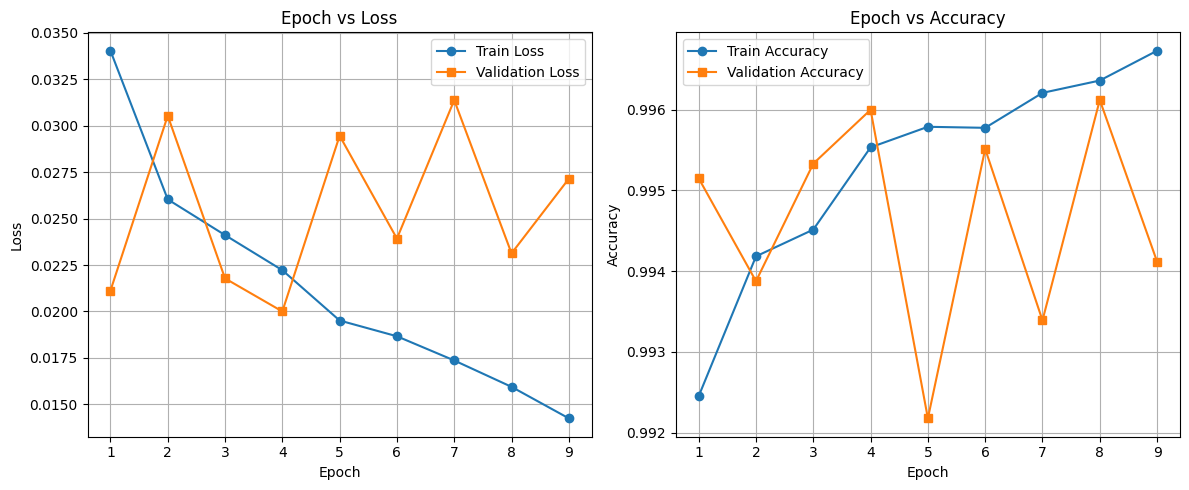

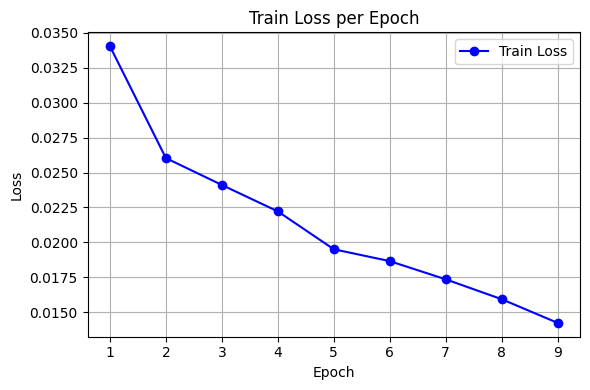

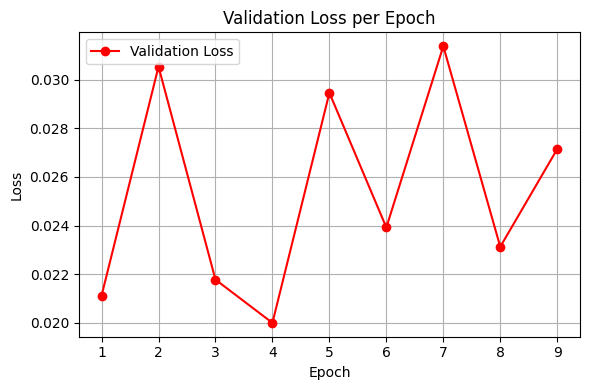

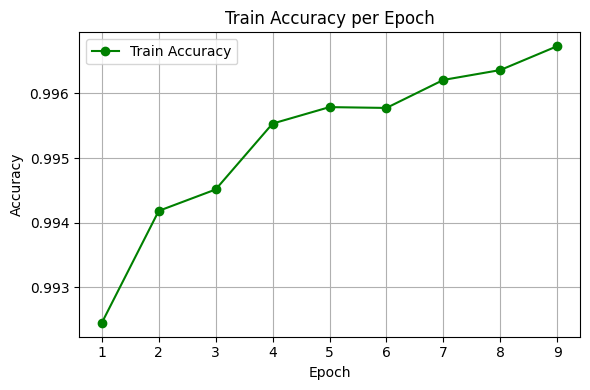

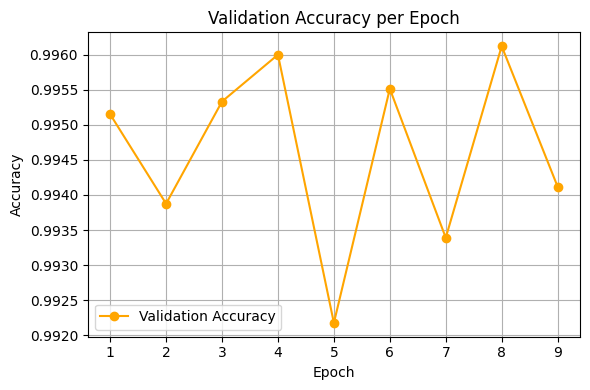

In [12]:
plot_results(train_losses, train_accuracies, val_losses, val_accuracies)

Evaluating: 100%|██████████| 1067/1067 [01:15<00:00, 14.20it/s]

Precision: 0.9958
Recall:    0.9934
F1 Score:  0.9946
AUC:       0.9994


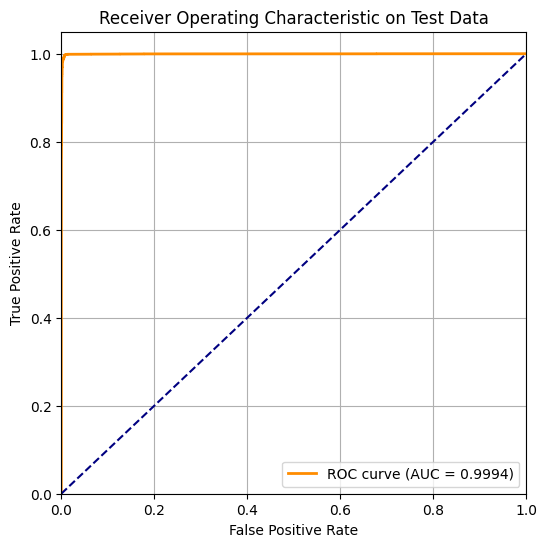

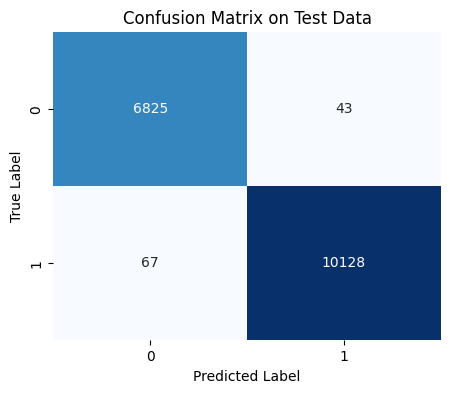

In [13]:
eval_on_metrics(model, test_dataloader)